In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab  as plt
import yfinance as yf
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [4]:
ticker_symbol = "DY"

# Define the start and end dates for the data
start_date = "2022-01-01"
end_date = "2022-12-31"

# Download the data using yfinance library
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Print the first few rows of the data
print(data.head(100))

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2022-01-03  94.800003  96.959999  93.809998  95.790001  95.790001  205900
2022-01-04  96.330002  98.459999  95.870003  97.730003  97.730003  264800
2022-01-05  97.650002  98.699997  92.919998  93.000000  93.000000  183200
2022-01-06  93.779999  95.120003  92.120003  93.559998  93.559998  277600
2022-01-07  93.239998  94.120003  89.650002  89.769997  89.769997  267400
...               ...        ...        ...        ...        ...     ...
2022-05-19  78.839996  81.470001  78.839996  79.629997  79.629997  305600
2022-05-20  80.730003  81.080002  77.699997  79.610001  79.610001  265800
2022-05-23  81.089996  81.500000  79.809998  80.919998  80.919998  288100
2022-05-24  80.180000  80.959999  78.870003  80.209999  80.209999  268000
2022-05-25  88.379997  94.769997  87.900002  94.209999  94.209999  696300

[100 rows x 6 columns]


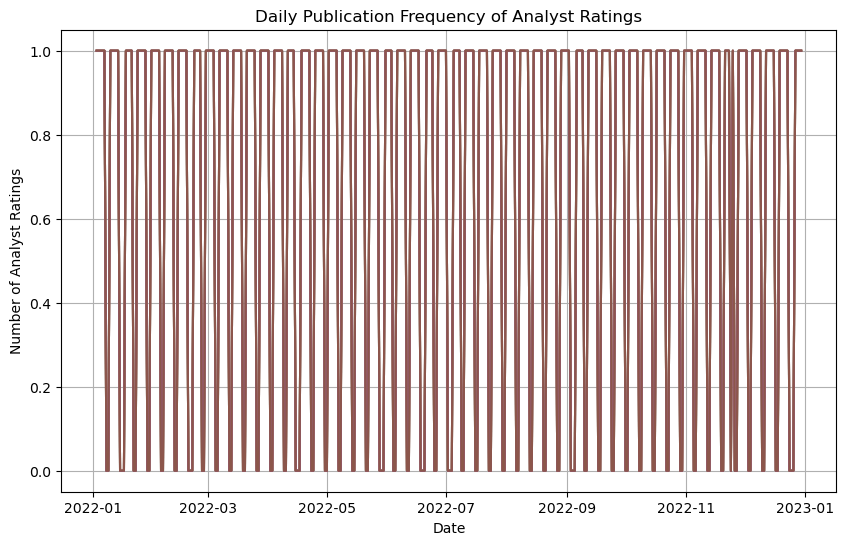

In [15]:


daily_counts = data.resample('D').count()

# Plot time series of daily publication counts
plt.figure(figsize=(10, 6))
plt.plot(daily_counts.index, daily_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of Analyst Ratings')
plt.title('Daily Publication Frequency of Analyst Ratings')
plt.grid(True)
plt.show()

# Example: Identify potential spikes around a specific event date (replace with actual date)
event_date = pd.to_datetime('2020-03-20')  # Replace with your event date
window_size = 7  # Days before and after the event to consider

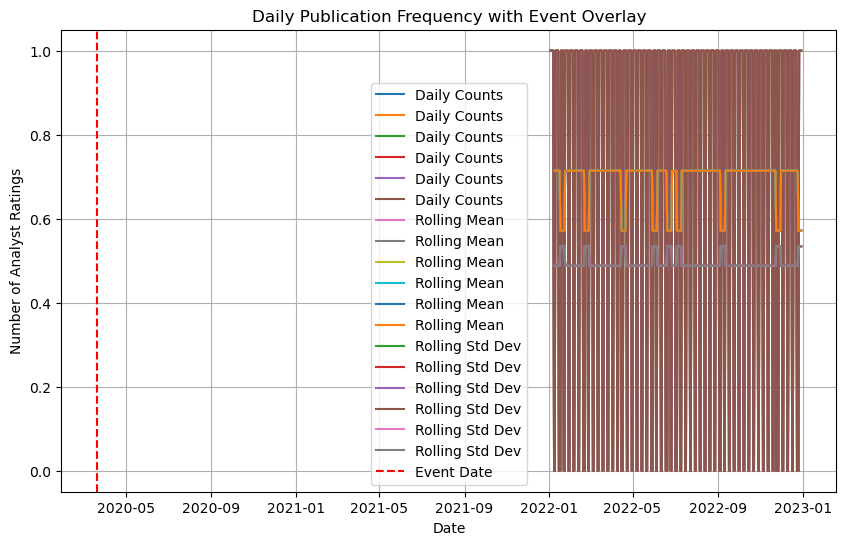

In [10]:


# Calculate rolling mean and standard deviation of daily counts
daily_counts_rolling_mean = daily_counts.rolling(window=window_size).mean()
daily_counts_rolling_std = daily_counts.rolling(window=window_size).std()

# Plot daily counts with rolling mean and standard deviation
plt.figure(figsize=(10, 6))
plt.plot(daily_counts.index, daily_counts.values, label='Daily Counts')
plt.plot(daily_counts_rolling_mean.index, daily_counts_rolling_mean.values, label='Rolling Mean')
plt.plot(daily_counts_rolling_mean.index, daily_counts_rolling_std.values, label='Rolling Std Dev')
plt.axvline(x=event_date, color='r', linestyle='--', label='Event Date')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of Analyst Ratings')
plt.title('Daily Publication Frequency with Event Overlay')
plt.grid(True)
plt.show()


